In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Reading data
loan=pd.read_csv('train_loan_data.csv')
loan

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-00,10+ years,Sports Group Manager,664,660,G,MORTGAGE,Individual,...,0.0,debt_consolidation,20201,93.5,G3,60 months,Debt consolidation,42,Verified,Defaulted
79996,NH,45000.0,Aug-95,10+ years,Web Designer,684,680,C,MORTGAGE,Individual,...,0.0,debt_consolidation,6145,56.9,C1,36 months,Debt consolidation,14,Not Verified,Paid
79997,NY,90000.0,Apr-05,< 1 year,Program Officer,724,720,B,OWN,Individual,...,0.0,debt_consolidation,3910,25.6,B4,36 months,Debt consolidation,26,Source Verified,Paid
79998,TX,94000.0,Apr-92,3 years,Sr. Business Analyst,669,665,D,MORTGAGE,Individual,...,1.0,credit_card,11897,49.4,D5,60 months,Credit card refinancing,48,Source Verified,Paid


In [3]:
#Data information
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [4]:
#Finding null value
loan.isnull().sum()


addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [5]:
#Droping null value
loan.dropna(inplace=True)

In [6]:
#Statistics descriptive analysis
loan.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,7.037500e+04,70375.000000,70375.000000,70375.000000,70375.000000,70375.000000,70375.00000,7.037500e+04,70375.000000,70375.000000,70375.000000,7.037500e+04,70375.000000,70375.000000
mean,7.812718e+04,699.144398,695.144227,13.257706,14689.951332,3.647417,1.67227,1.446263e+05,11.790409,0.217819,0.136782,1.662945e+04,52.177229,25.272455
std,7.162171e+04,31.154326,31.153503,4.796940,8755.183715,2.261829,2.00080,1.607175e+05,5.534244,0.584177,0.383931,2.323391e+04,24.298831,12.066326
min,0.000000e+00,664.000000,660.000000,5.310000,1000.000000,0.000000,0.00000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.800000e+04,674.000000,670.000000,9.750000,8000.000000,2.000000,0.00000,3.102950e+04,8.000000,0.000000,0.000000,6.134000e+03,34.000000,16.000000
50%,6.503300e+04,694.000000,690.000000,12.740000,12500.000000,3.000000,1.00000,8.508200e+04,11.000000,0.000000,0.000000,1.131200e+04,52.600000,24.000000
75%,9.242500e+04,714.000000,710.000000,16.020000,20000.000000,5.000000,3.00000,2.152635e+05,15.000000,0.000000,0.000000,1.994300e+04,70.900000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,31.00000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


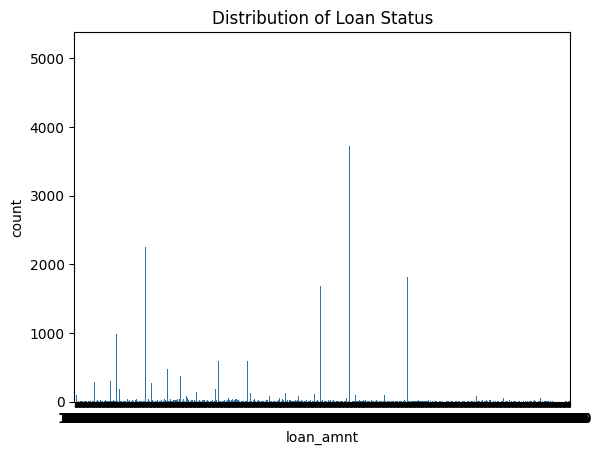

In [7]:
sns.countplot(x='loan_amnt', data=loan)
plt.title('Distribution of Loan Status')
plt.show()


In [8]:
categorical_columns = loan.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')


In [9]:
numerical_columns = loan.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')


In [10]:
df = pd.get_dummies(loan, columns=categorical_columns, drop_first=True)


In [11]:
X = loan.drop(columns=['loan_amnt'])
y = loan['loan_amnt']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train['annual_inc']=X_train['annual_inc'].astype(str)

In [14]:
X_train.dtypes

addr_state               object
annual_inc               object
earliest_cr_line         object
emp_length               object
emp_title                object
fico_range_high           int64
fico_range_low            int64
grade                    object
home_ownership           object
application_type         object
initial_list_status      object
int_rate                float64
num_actv_bc_tl          float64
mort_acc                float64
tot_cur_bal             float64
open_acc                  int64
pub_rec                   int64
pub_rec_bankruptcies    float64
purpose                  object
revol_bal                 int64
revol_util              float64
sub_grade                object
term                     object
title                    object
total_acc                 int64
verification_status      object
loan_status              object
dtype: object

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


ValueError: could not convert string to float: 'CO'